In [11]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

In [12]:
#loadData, return [time,position] or [time,effort] as a 2-dimensional list
def loadData(filename):
    f=open(filename,'r') 
    lines=f.readlines()
    x=[]
    y=[]
    for line in lines[1:]:
        point=line.split()
        x.append(point[0])
        y.append(point[1])
    return [x,y]



#Curve fitting
#time_p is the points of time selected in [time-position]
#In order to reduce the error, we decide to only fit [time-position],and then calculate the corresponding position at time_e
#time_e is the points of time selected in [time-effort]
def try_polyfit(time_p,position,time_e,effort_origin,title_each):
    
    
    #Linear fitting
    f1=np.polyfit(time_p,position,1)
    p1=np.poly1d(f1)
    
    #delete the negative effort when the sample is not under tension 
    time_e=np.delete(time_e,np.where(effort_origin < 0))
    effort=np.delete(effort_origin,np.where(effort_origin < 0))
    #print(time_e.shape)


    
    # get the estimated position at time_e
    pos_estimate=p1(time_e)
    
    
    
    fig=plt.figure(figsize=(6,6))
    ax1,ax2 = fig.subplots(2,1)
  
    # Uncomment the following code to observe the original data
    #ax1.plot(time_p,position,color='green', label='original position')
    
    
    #draw x=time_e, y1=estimated position y2=effort
    ax1.plot(time_e, pos_estimate,color='blue', label='estimated position') 
    ax1.set_xlabel('time/s')
    ax1.set_ylabel('position/mm')
    ax1.legend()
    ax1.set_title(title_each)
    
    ax=ax1.twinx()
    ax.plot(time_e,effort,color='orange', label='original effort')
    ax.set_ylabel('effort/N')
    ax.legend(loc='lower right', shadow=True)
    
    
    #draw x=pos_estimate, y=effort
    ax2.plot(pos_estimate,effort)
    ax2.set_xlabel('position / mm')
    ax2.set_ylabel('effort / N')
    #ax2.set_title(title_each)

    return pos_estimate,effort


#read files of each test in directory "Data" and "Data_2"
def load_files(filenames_pos,filenames_eff,width,thickness,length):
    
    fig_final=plt.figure(figsize=(6,5))
    ax3=fig_final.subplots(1,1)

    for i in range(len(filenames_pos)):
        
        data_t_pos=loadData(filenames_pos[i])
        data_t_pos=np.array(data_t_pos).astype(float)

        data_t_eff=loadData(filenames_eff[i])
        data_t_eff=np.array(data_t_eff).astype(float)

        #polyfit and draw  
        position_selected,effort_selected=try_polyfit(data_t_pos[0],data_t_pos[1],data_t_eff[0],data_t_eff[1],filenames_pos[i][:18])
        
        # draw x=strain y=stress
        strain=(position_selected-position_selected[0])/length
        
        # we use PK1 stress(MPa)  (engineering stress) here: stress= effort/area_original 
        stress=effort_selected/(width[i]*thickness[i])
        ax3.plot(strain,stress,label=filenames_pos[i][:15])
        ax3.set_xlabel('strain')
        ax3.set_ylabel('stress /Mpa')
        ax3.legend()
        ax3.set_title('mechanical behavior')
    plt.close()
        

In [13]:
#initialize parameters
L=15
width=[11,11,11,10,10,10,10,10,10,11,10,9,10,10,9,12]
thickness=[0.92,0.63,0.41,0.46,0.51,0.44,0.43,0.47,0.47,0.49,0.48,0.53,0.60,0.81,0.76,0.71]


<IPython.core.display.Javascript object>


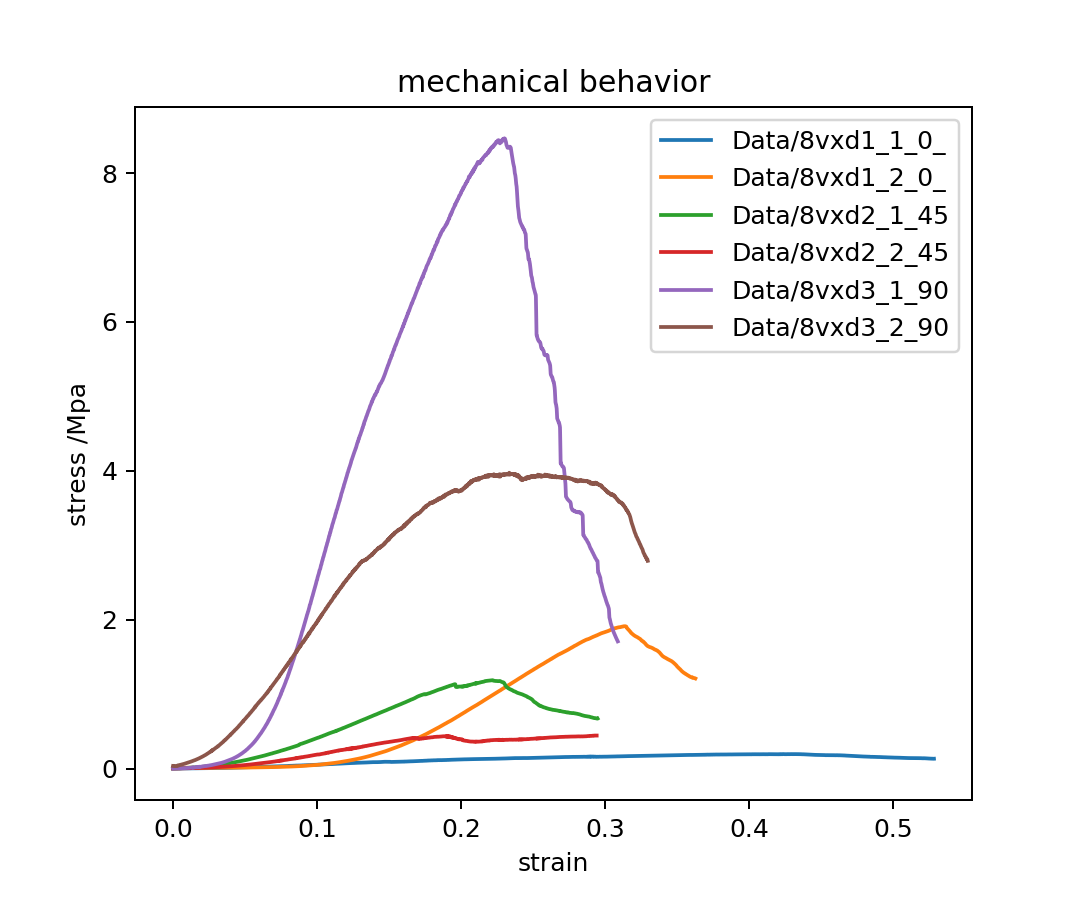

<IPython.core.display.Javascript object>


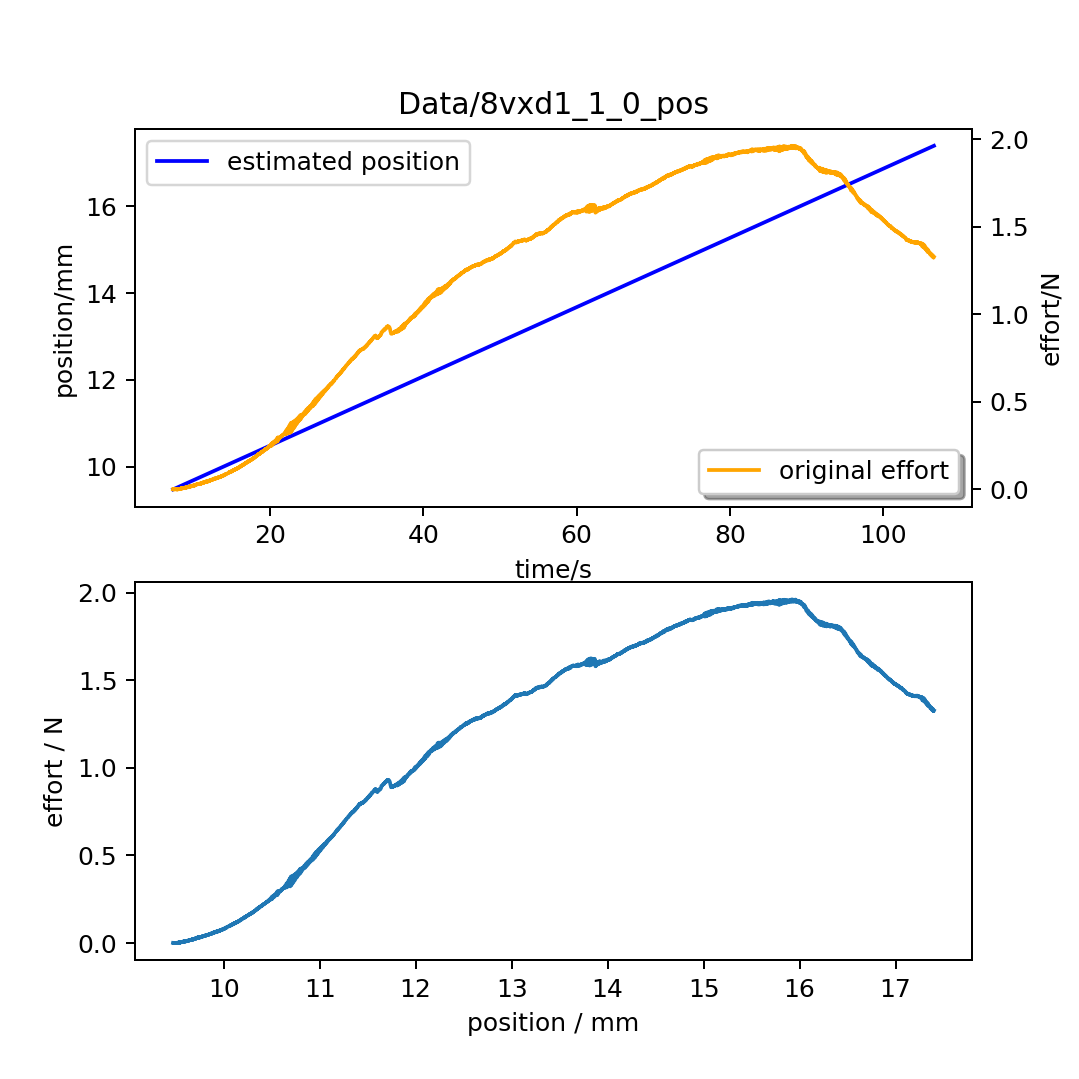

<IPython.core.display.Javascript object>


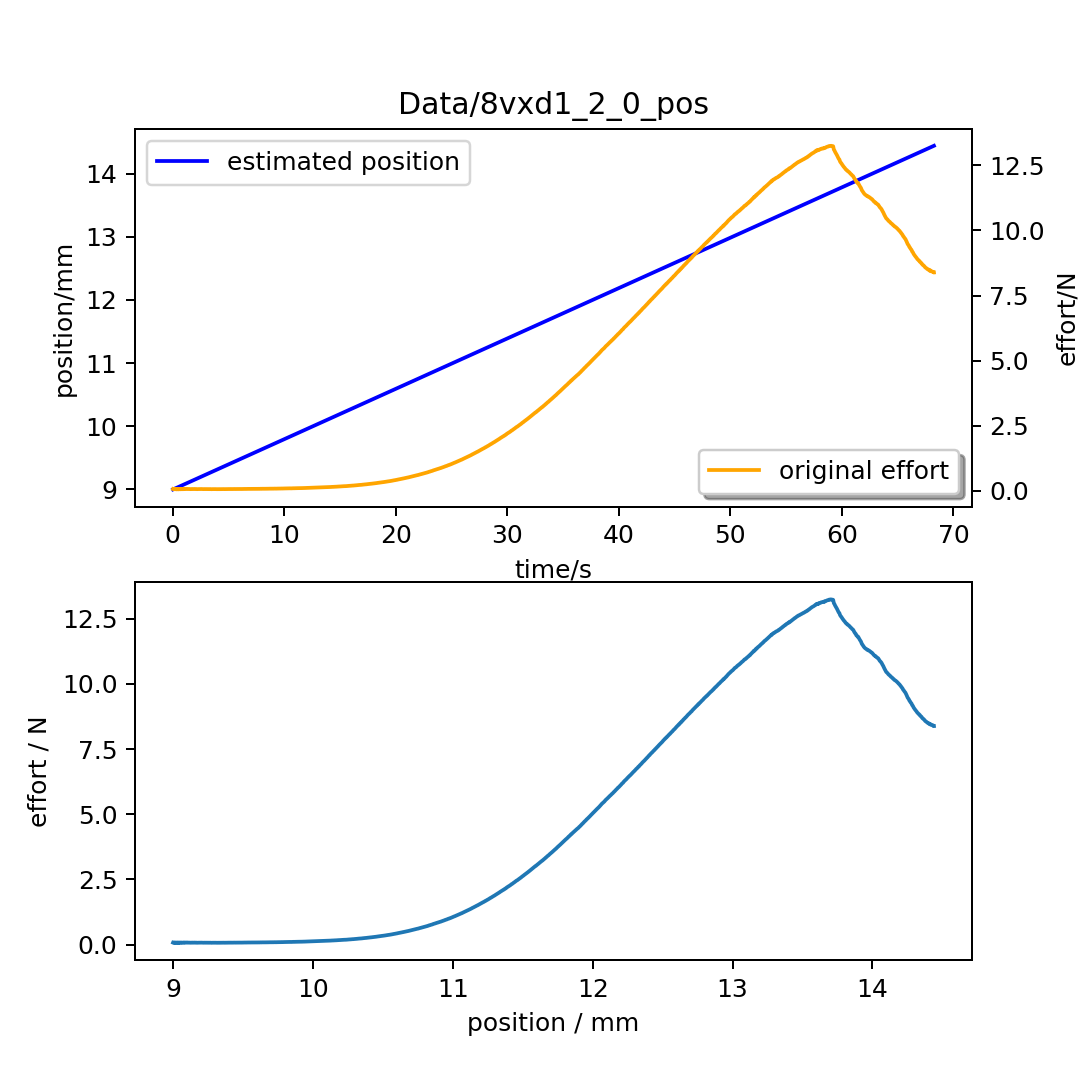

<IPython.core.display.Javascript object>


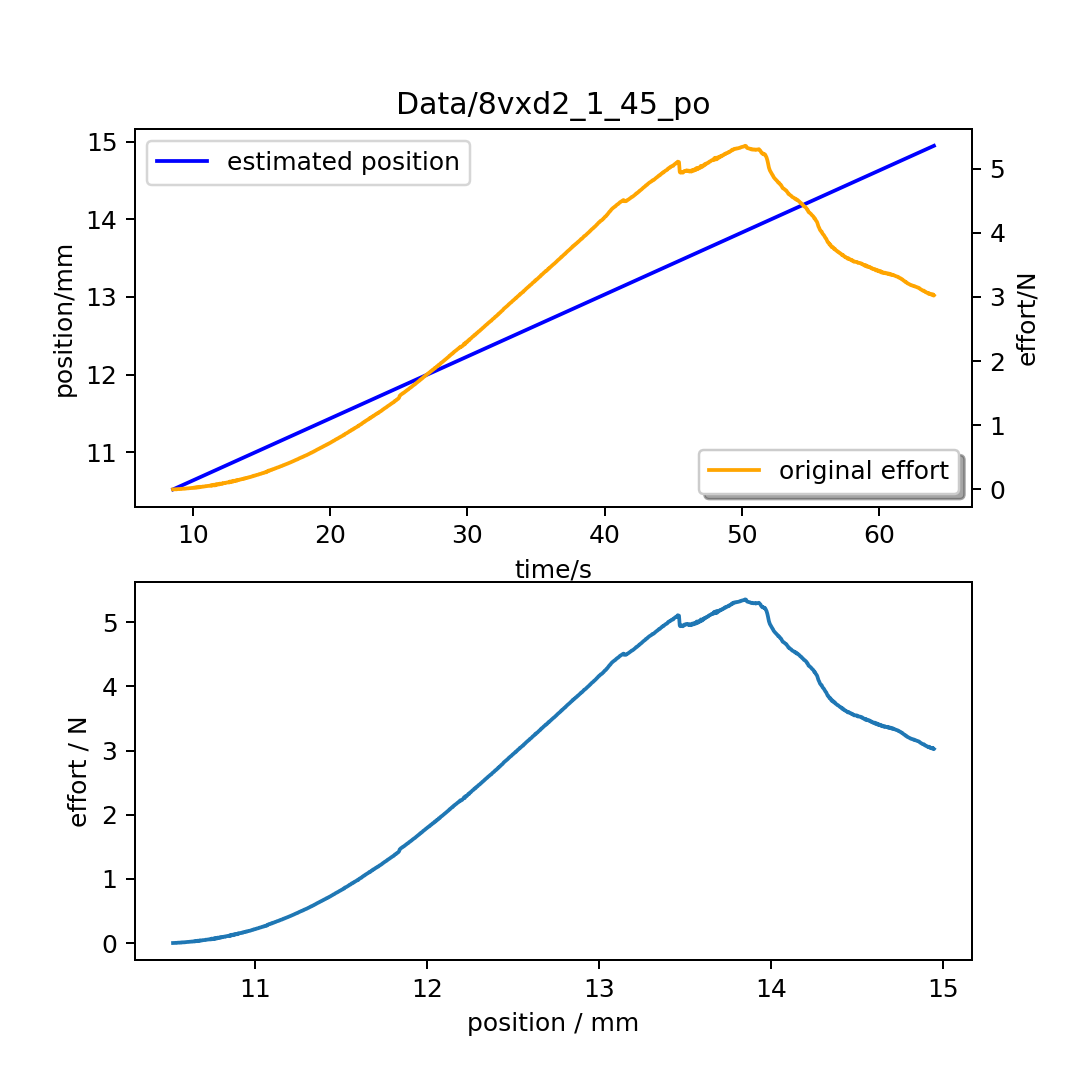

<IPython.core.display.Javascript object>


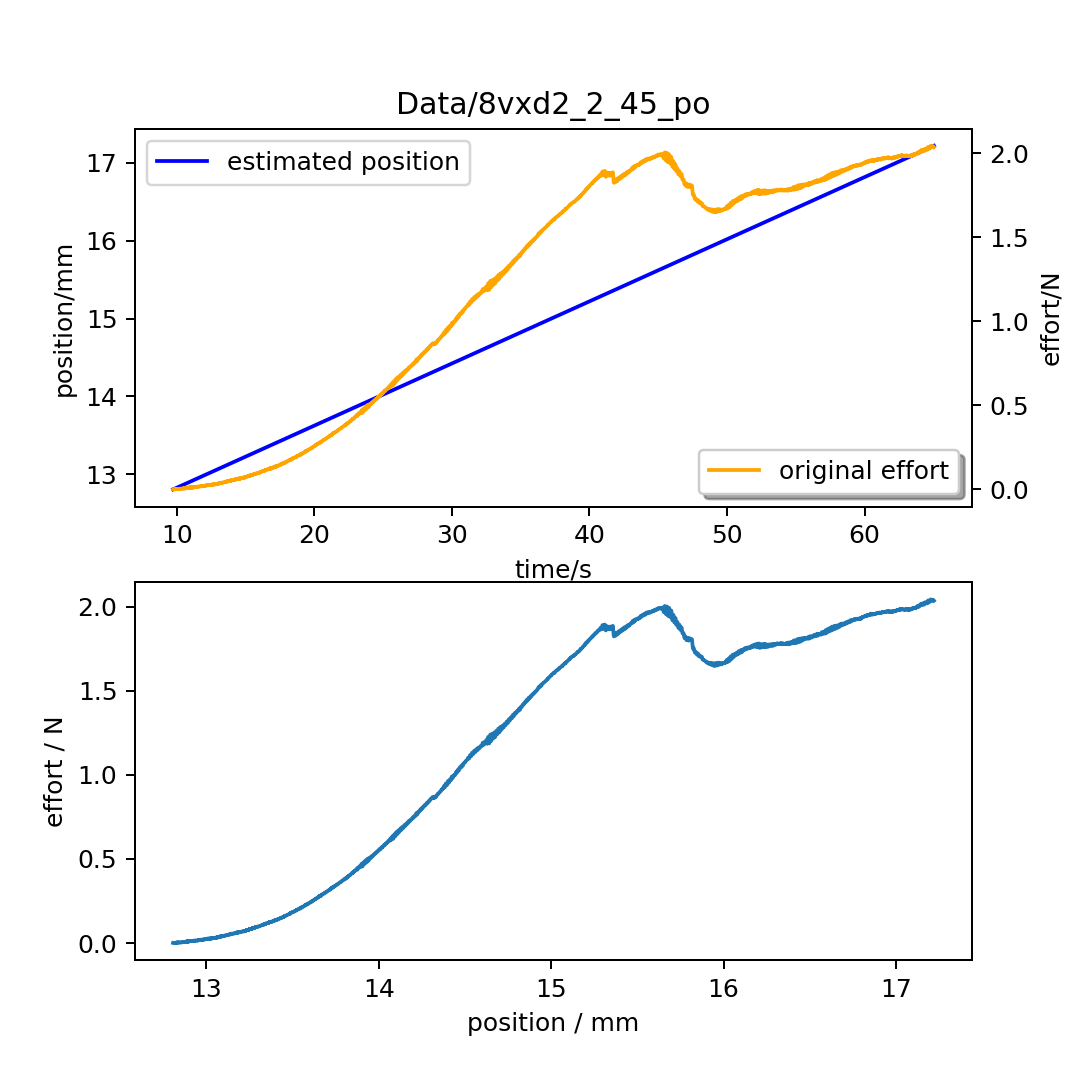

<IPython.core.display.Javascript object>


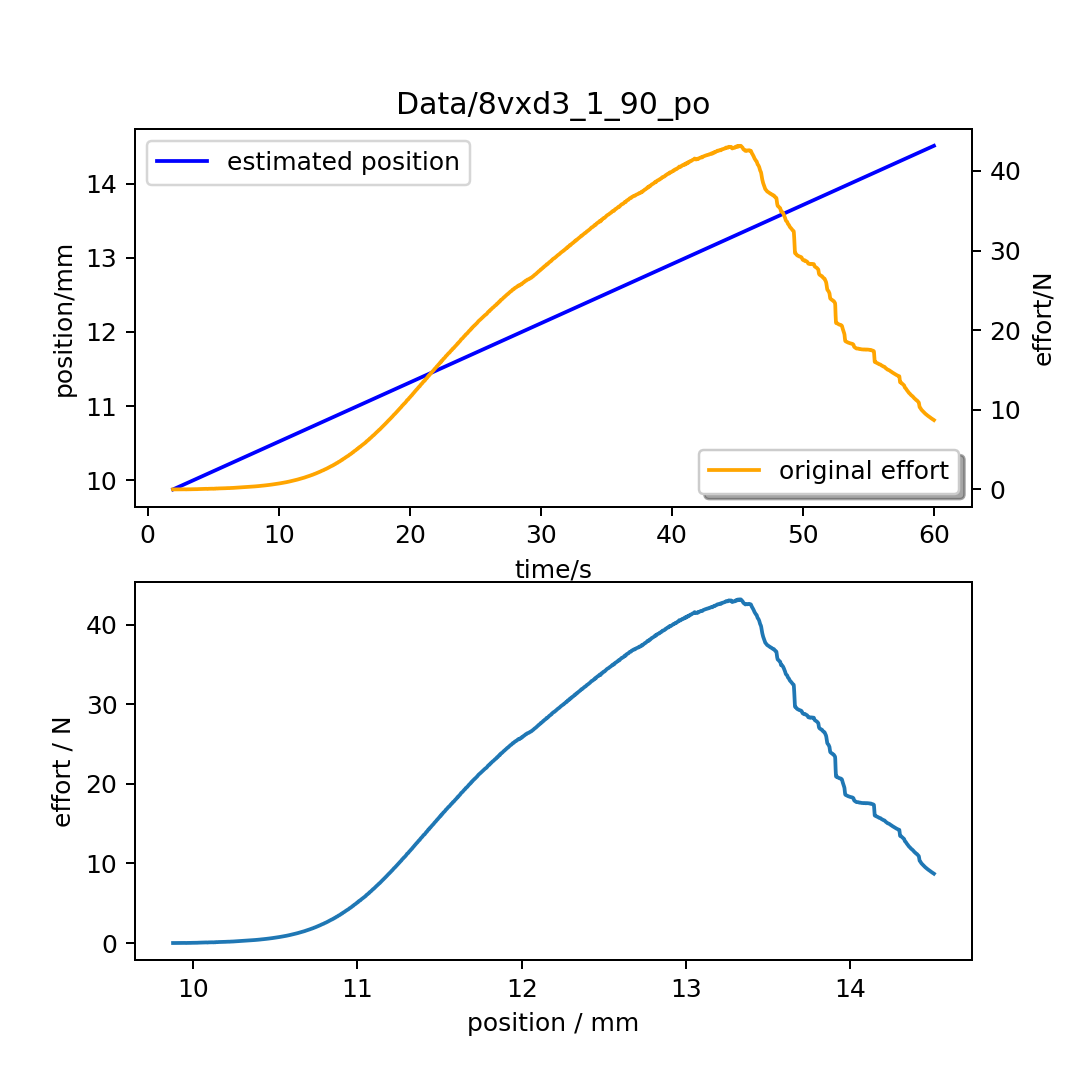

<IPython.core.display.Javascript object>


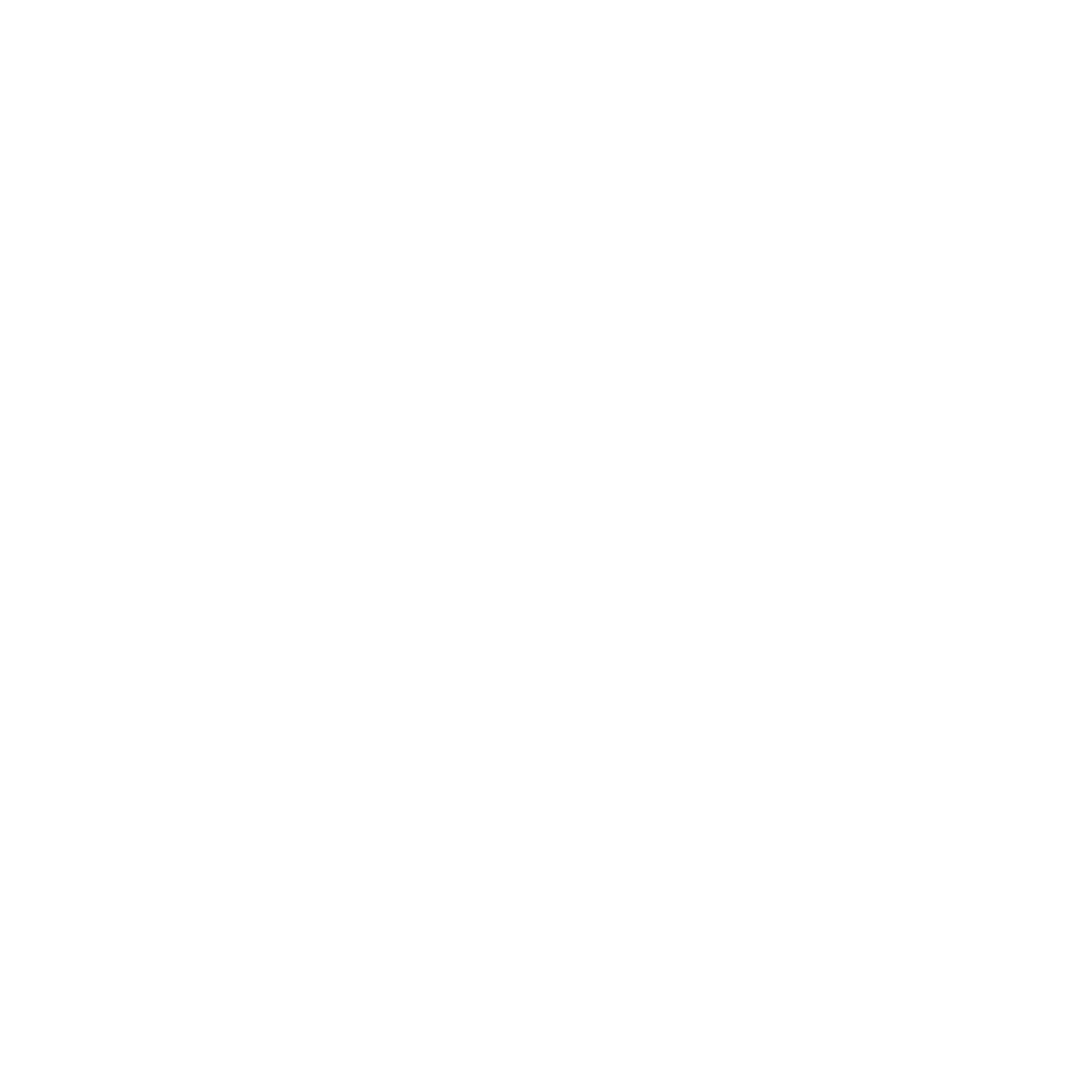

In [14]:
#get filenames_pos and filenames_eff ,then order them alphabetically
import os
path1 = "Data" 

files1= os.listdir(path1) 


filenames_pos=[]
filenames_eff=[]

for file in sorted(files1): 
    p='Data/'+file
    if 'position' in file:
        filenames_pos.append(p)
    elif 'effort' in file:
        filenames_eff.append(p)
    else:
        pass



# final result and save it as images '.png'
load_files(filenames_pos,filenames_eff,width,thickness,L)


<IPython.core.display.Javascript object>


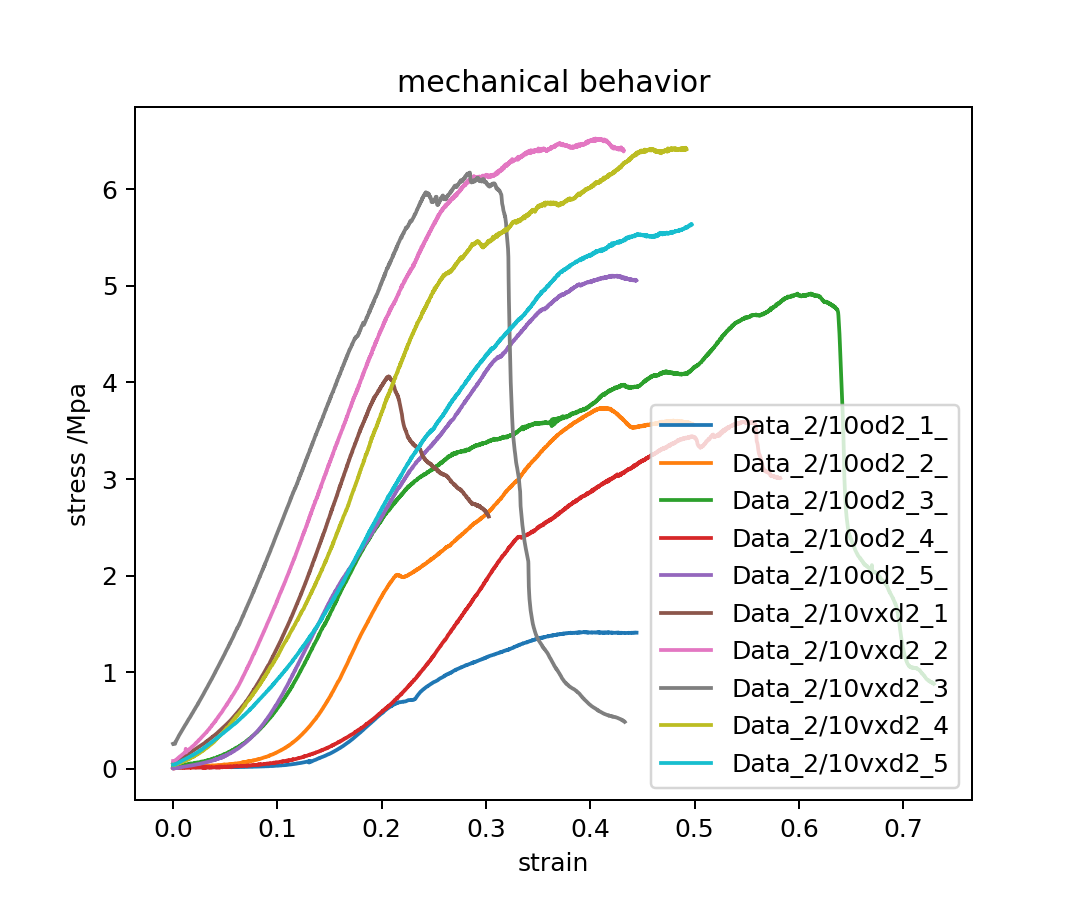

<IPython.core.display.Javascript object>


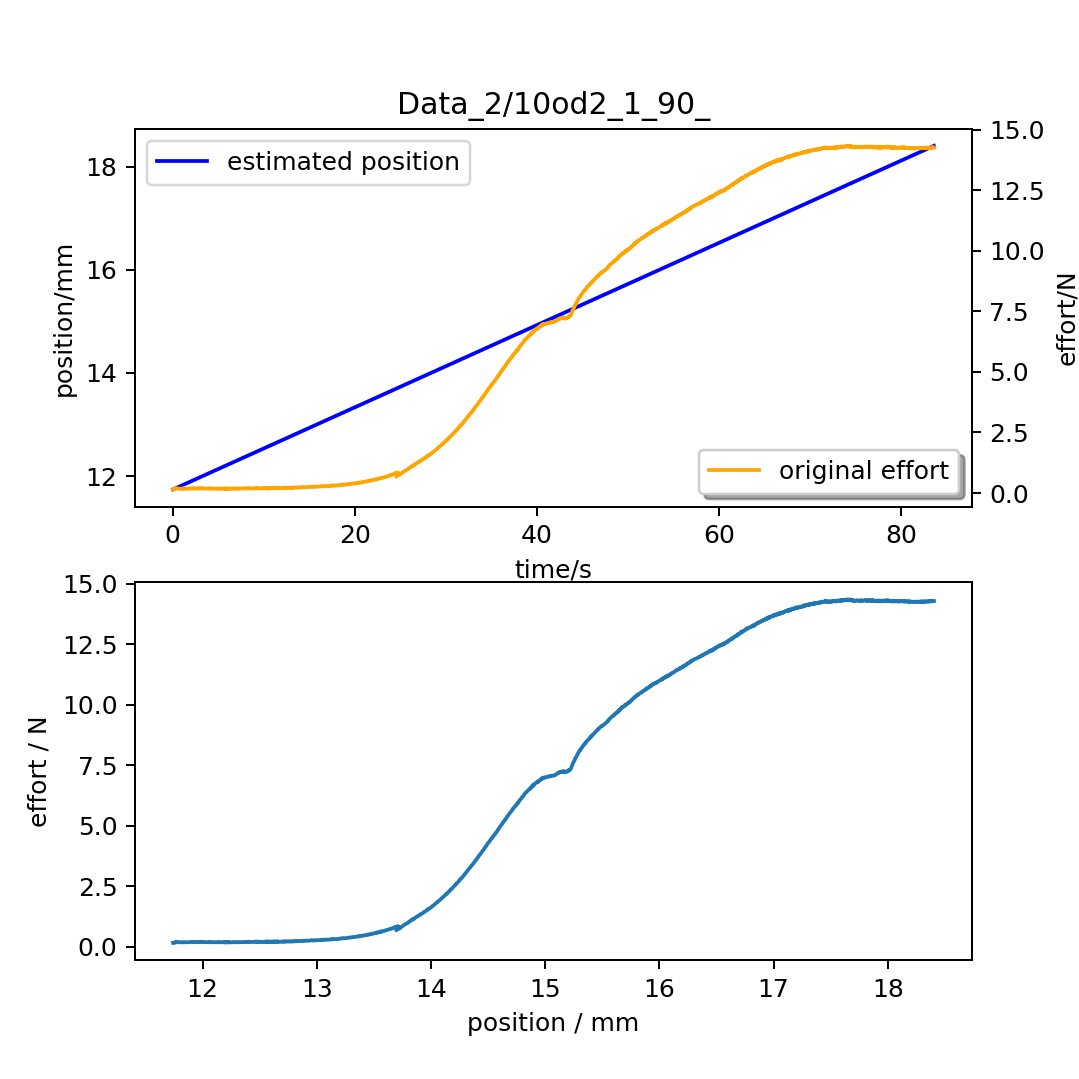

<IPython.core.display.Javascript object>


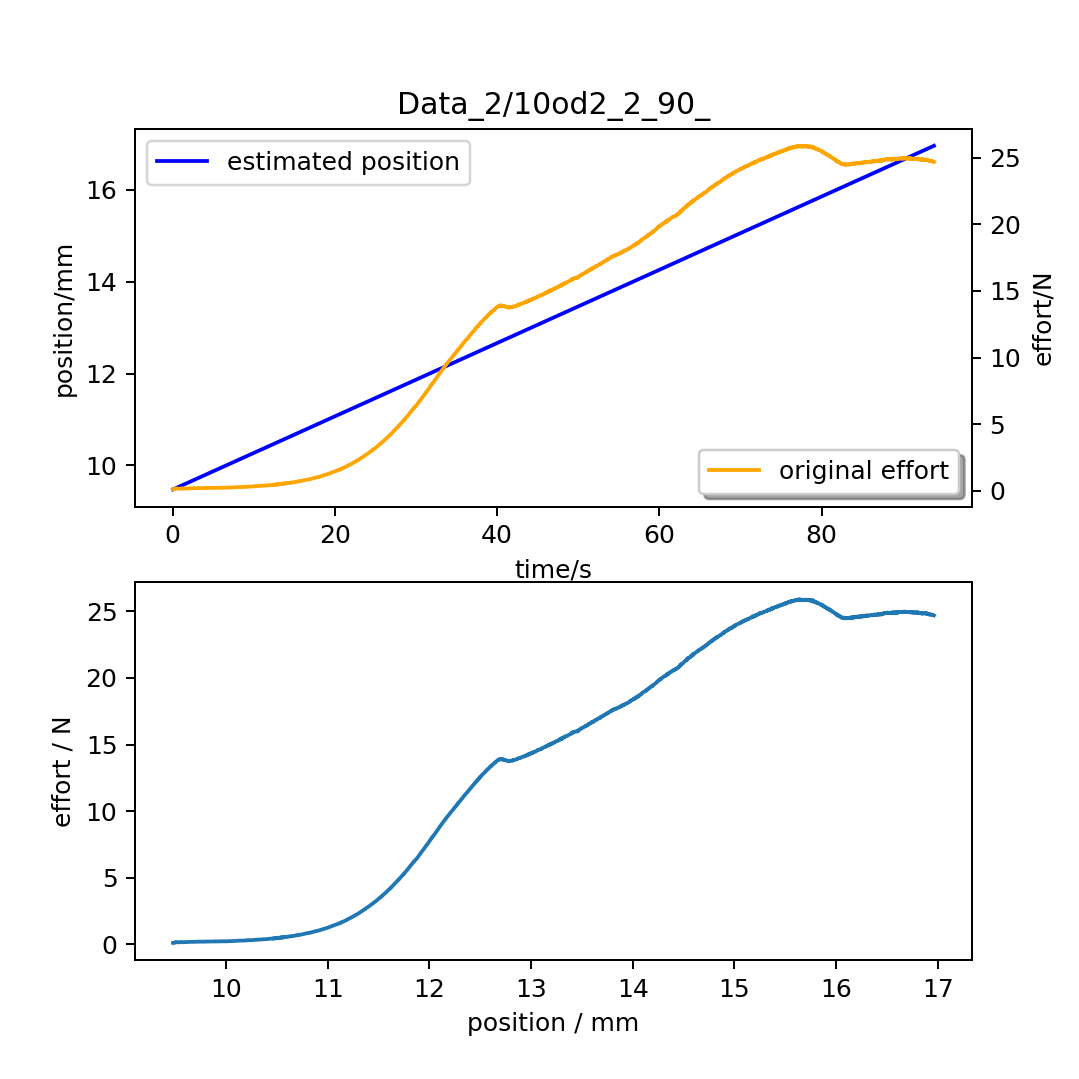

<IPython.core.display.Javascript object>


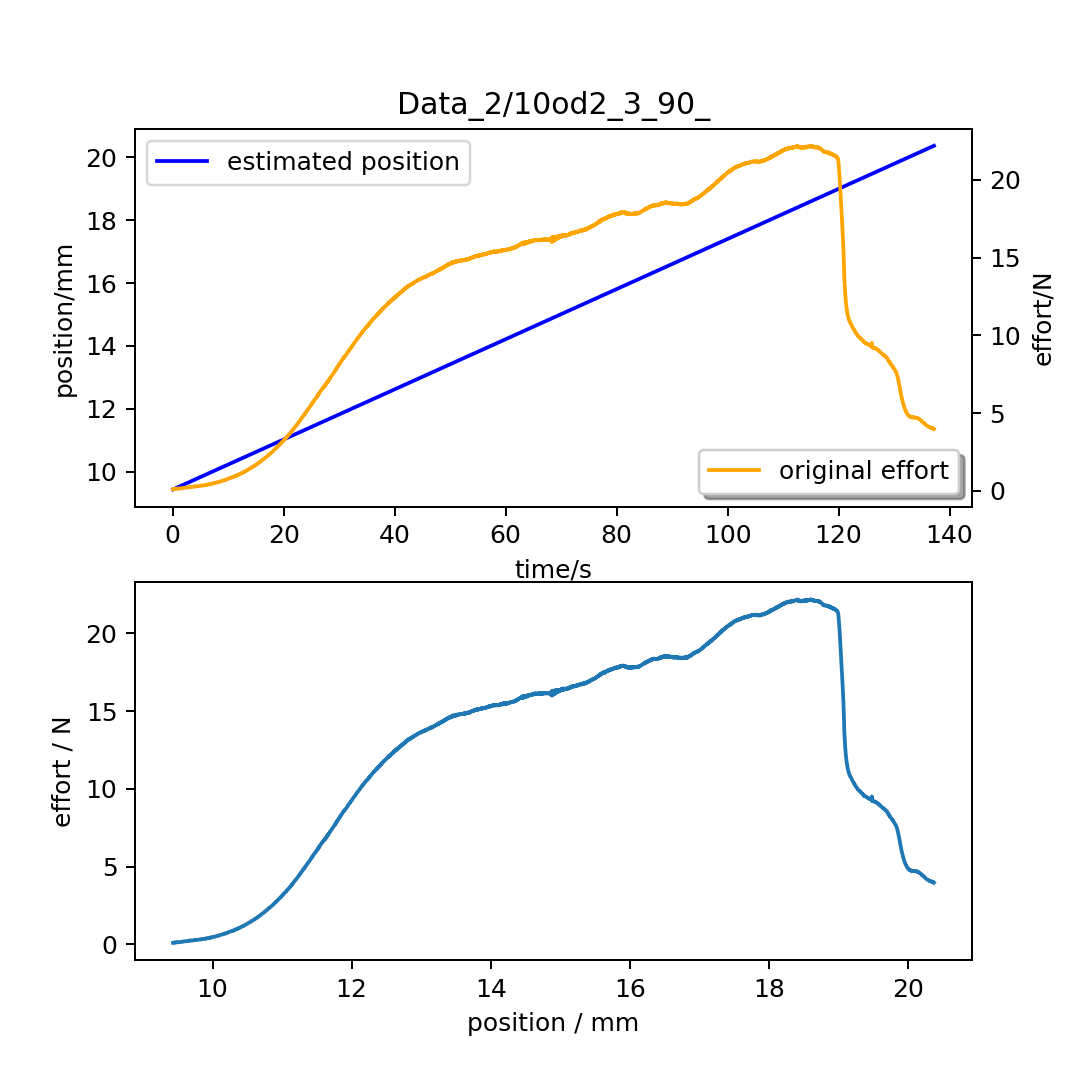

<IPython.core.display.Javascript object>


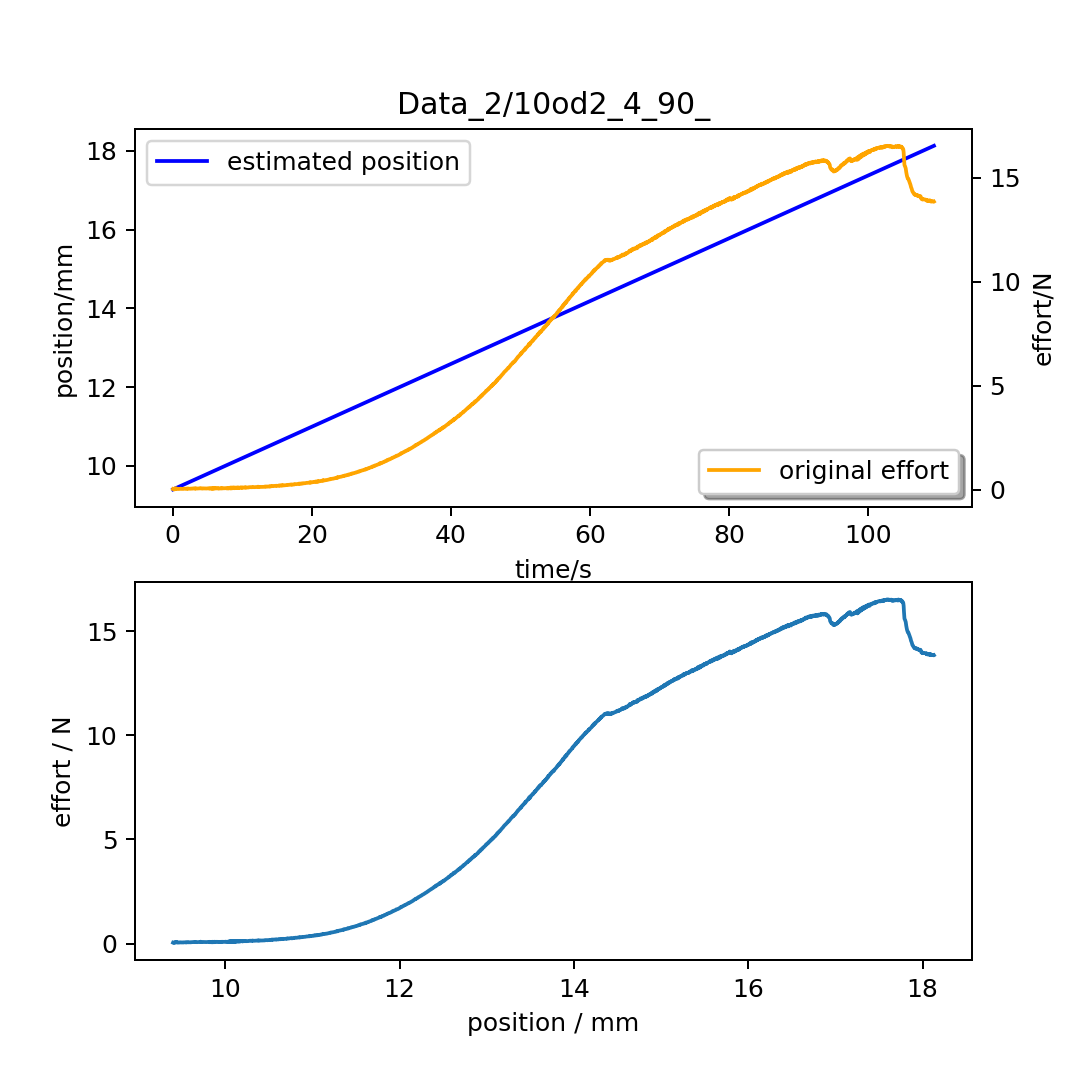

<IPython.core.display.Javascript object>


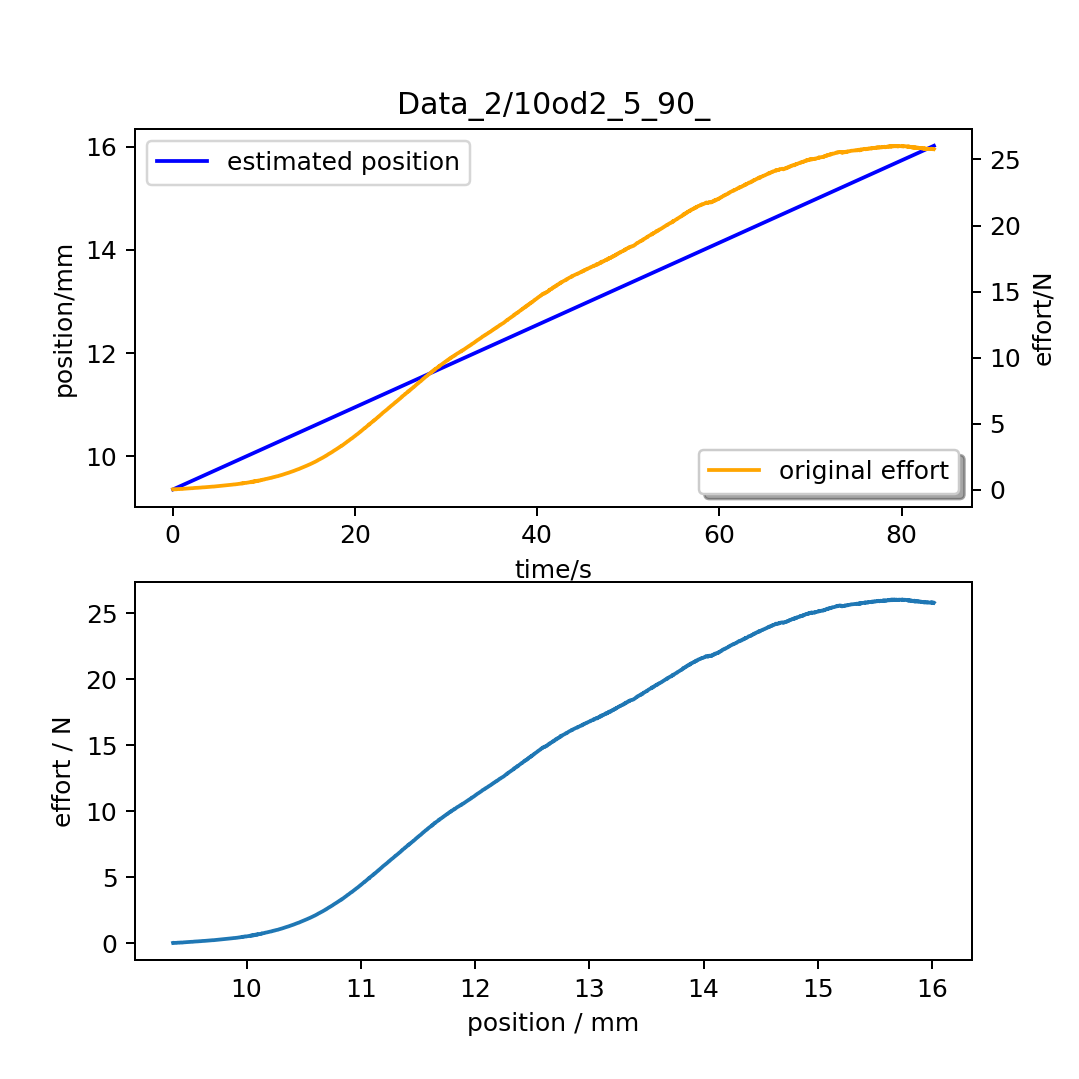

<IPython.core.display.Javascript object>


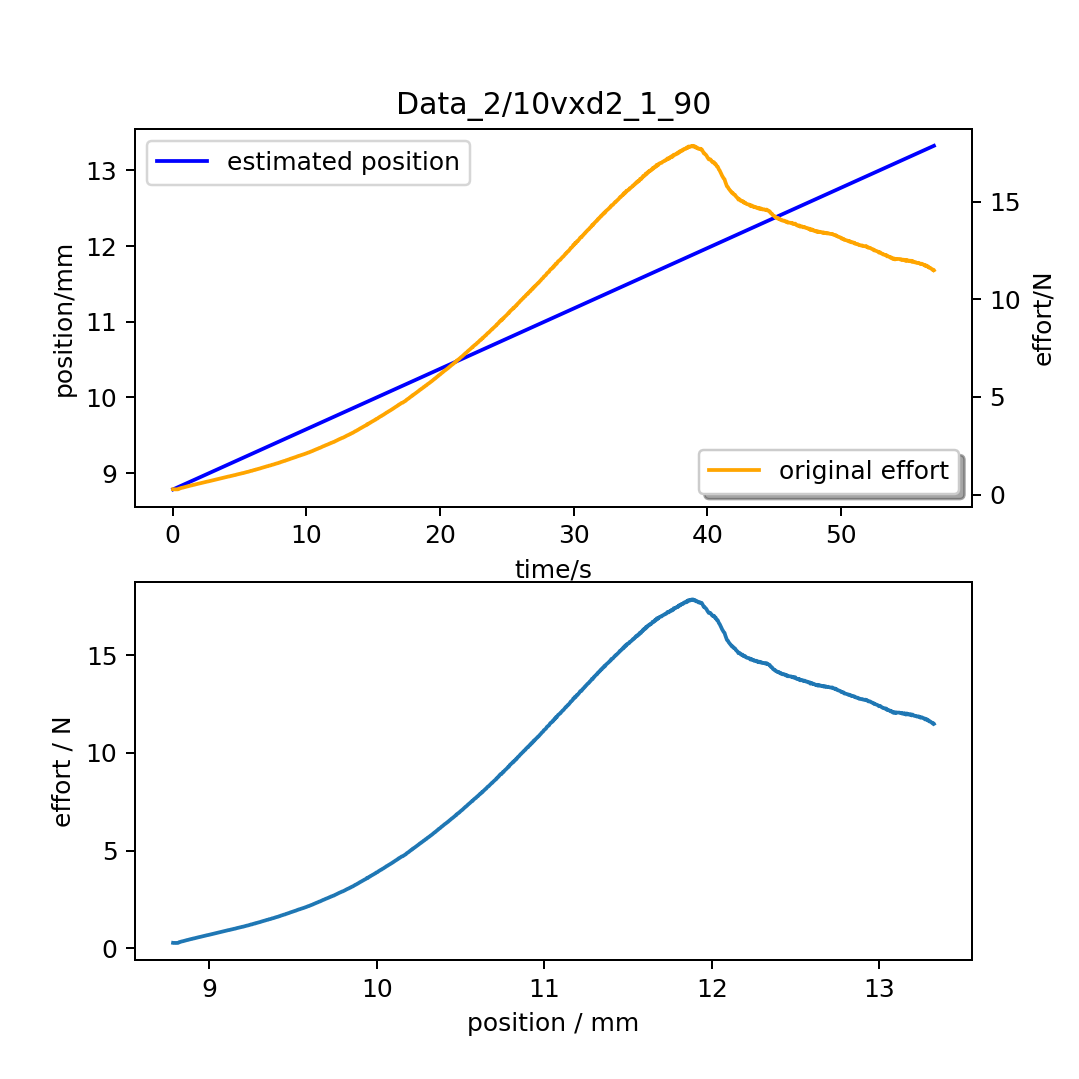

<IPython.core.display.Javascript object>


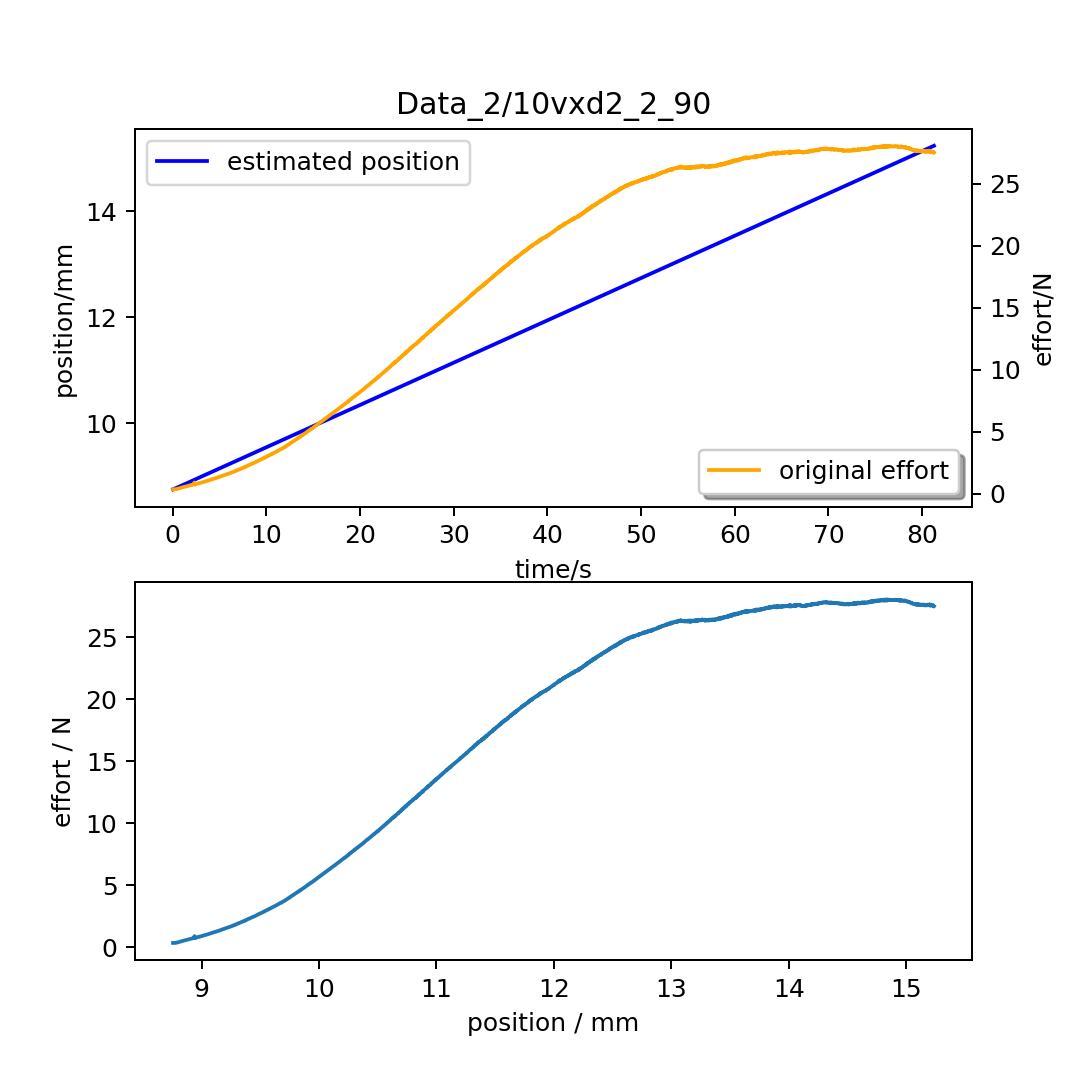

<IPython.core.display.Javascript object>


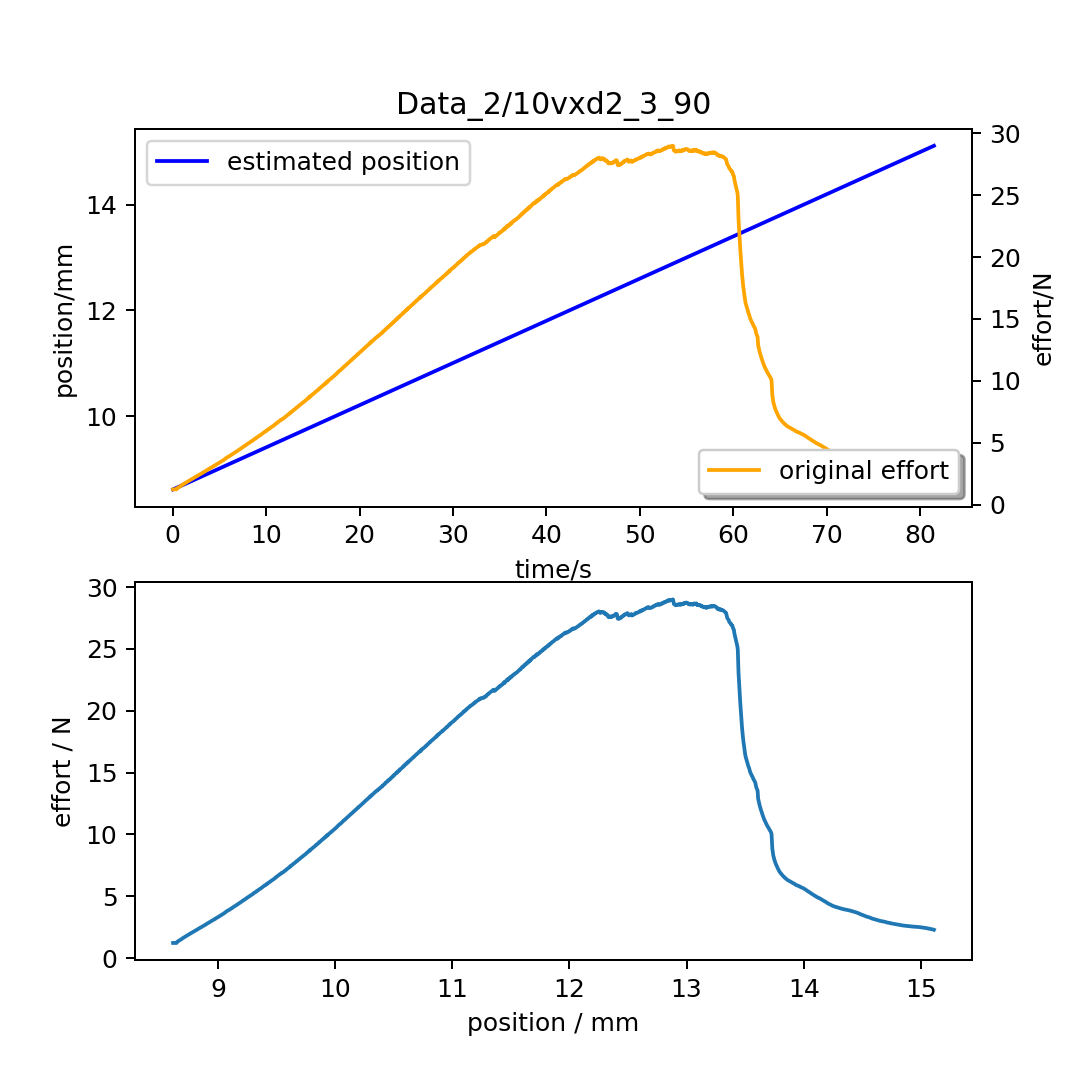

<IPython.core.display.Javascript object>


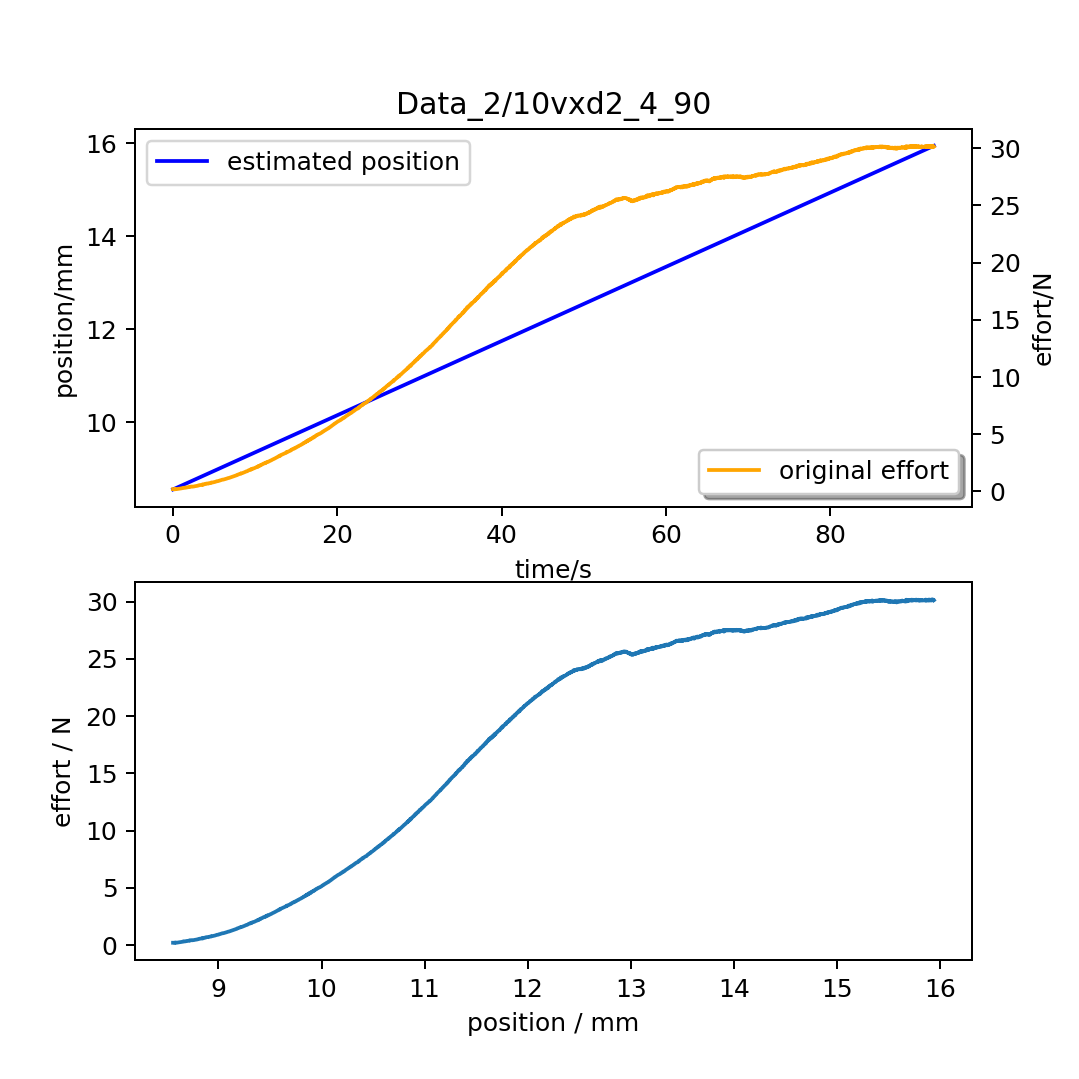

<IPython.core.display.Javascript object>


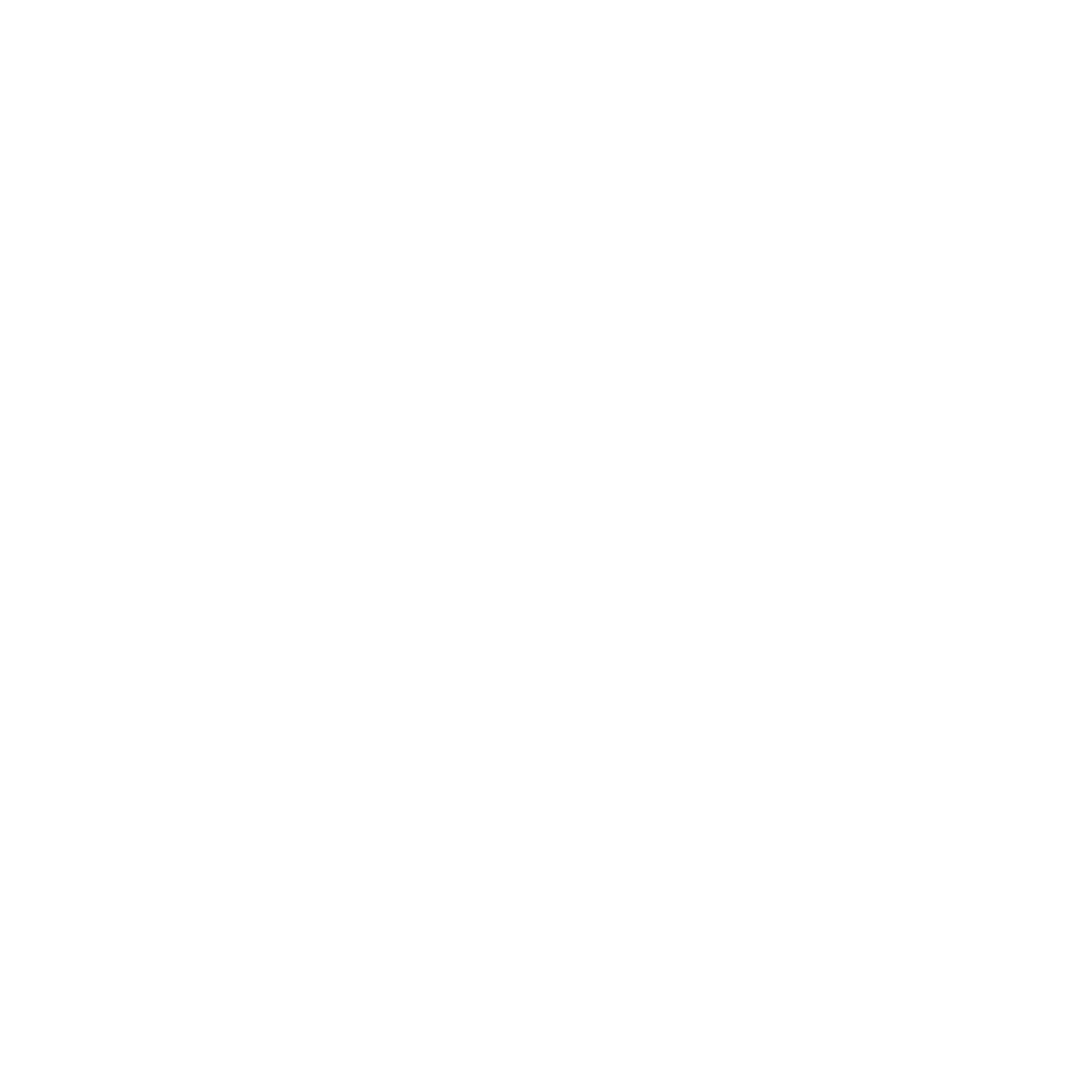

In [15]:
path2="Data_2"
files2=os.listdir(path2) 
filenames_pos=[]
filenames_eff=[]

for file in sorted(files2): 
    p='Data_2/'+file
    if 'position' in file:
        filenames_pos.append(p)
    elif 'effort' in file:
        filenames_eff.append(p)
    else:
        pass

    
# final result and save as .png
load_files(filenames_pos,filenames_eff,width,thickness,L)